In [1]:
from matplotlib.pyplot import show as show_static
import matplotlib.pyplot as plt
import numpy as np
import sys
import glob
from scipy import stats

sys.path.append('../../')
from utils import dataframe_utils, clustering_utils

In [2]:
microarray_data_pattern = './tgd2024_may15_avg_scan_stats_microarray/**/*.csv'

rna_seq_data_pattern = './tgd2024_jun20_avg_scan_stats_rna_seq/**/*.csv'

microarray_stats_files = glob.glob(microarray_data_pattern)

rna_seq_stats_files = glob.glob(rna_seq_data_pattern)

microarray_stats_df = dataframe_utils.csv_files_to_df(microarray_stats_files)

rna_seq_stats_df = dataframe_utils.csv_files_to_df(rna_seq_stats_files)

In [3]:
microarray_stats_df['fraction_clusters_enriched'] = microarray_stats_df.apply(clustering_utils.compute_fraction_clusters_enriched, axis=1)

In [4]:
rna_seq_stats_df['fraction_clusters_enriched'] = rna_seq_stats_df.apply(clustering_utils.compute_fraction_clusters_enriched, axis=1)

     clustering                    datetime dimensionality  \
281  leiden_cpm  2024-06-20 11:22:38.664884       baseline   
720  leiden_cpm  2024-06-20 14:23:52.793743       baseline   

                         graph  max_cluster_size  max_enriched_cluster_size  \
281  umap_fuzzy_simplicial_set                79                         79   
720  umap_fuzzy_simplicial_set                79                         79   

     max_fraction_same_cluster_Histone_subset.tsv  \
281                                           1.0   
720                                           1.0   

     max_fraction_same_cluster_MCMsubset.tsv  \
281                                      0.5   
720                                      0.5   

     max_fraction_same_cluster_MucocystSubsets.tsv  \
281                                            0.5   
720                                            0.5   

     max_fraction_same_cluster_ProteosomeSubset.tsv  ...  parameter  \
281                                 

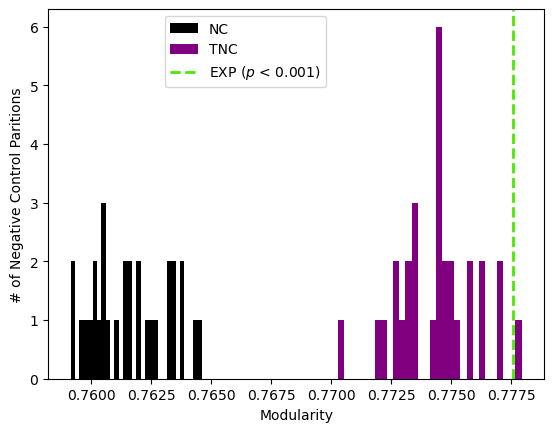

Empty DataFrame
Columns: [partition_type, dimensionality, metric, graph, nns, clustering, parameter, silhouette_score, modularity, nclusters, mean_cluster_size, median_cluster_size, sd_cluster_size, max_cluster_size, min_cluster_size, ngenes, nenriched_clusters, mean_enriched_cluster_size, median_enriched_cluster_size, sd_enriched_cluster_size, max_enriched_cluster_size, min_enriched_cluster_size, nenriched_cluster_genes, datetime, max_fraction_same_cluster_MCMsubset.tsv, max_fraction_same_cluster_RibosomalSubset.tsv, max_fraction_same_cluster_MucocystSubsets.tsv, max_fraction_same_cluster_Histone_subset.tsv, max_fraction_same_cluster_ProteosomeSubset.tsv, fraction_clusters_enriched]
Index: []

[0 rows x 30 columns]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [5]:
dfs = [rna_seq_stats_df, microarray_stats_df]

for df_stats in dfs:

    df_stats_exp = df_stats.loc[
        (df_stats['partition_type'] == 'EXP')
        &
        (df_stats['metric'] == 'manhattan')
        &
        (df_stats['nns'] == 3)
        &
        (df_stats['parameter'] == 0.005)
                                ]
    
    df_stats_nc = df_stats.loc[df_stats['partition_type'] == 'NC']
    df_stats_tnc = df_stats.loc[df_stats['partition_type'] == 'TNC']
    # hist_clustering_metric = 'silhouette_score'
    hist_clustering_metric = 'modularity'

    hist_data = df_stats_nc[hist_clustering_metric].values
    hist_data
    hist_data_tnc = df_stats_tnc[hist_clustering_metric].values
    hist_data_tnc
    exp_line_at_x = df_stats_exp[hist_clustering_metric].values[0]
    exp_line_at_x
    # tnc_line_at_x = df_stats_tnc[hist_clustering_metric].values[0]
    # tnc_line_at_x
    # Create the histogram
    plt.hist(hist_data, bins=30, color='black', label='NC')
    plt.hist(hist_data_tnc, bins=30, color='purple', label='TNC')

    # Add a vertical line at the specified x value
    # plt.axvline(x=exp_line_at_x, color='red', linestyle='dashed', linewidth=2, label='EXP at x={} ($P$ < 0.001)'.format(round(exp_line_at_x, 2)))
    # plt.axvline(x=tnc_line_at_x, color='blue', linestyle='dashed', linewidth=2, label='TNC at x={}'.format(round(tnc_line_at_x, 2)))
    plt.axvline(x=exp_line_at_x, color='#47EA00', linestyle='dashed', linewidth=2, label='EXP ($p$ < 0.001)')
    # plt.axvline(x=tnc_line_at_x, color='purple', linestyle='dashed', linewidth=2, label='TNC')


    # Add labels and title
    plt.xlabel(hist_clustering_metric.capitalize())
    plt.ylabel('# of Negative Control Paritions')
    # plt.title(f'{len(hist_data)} Neg. Controls vs. Experimental {hist_clustering_metric.capitalize()} Distribution')

    plt.legend(bbox_to_anchor=(0.575, 1))

    nc_mean = df_stats_tnc[hist_clustering_metric].mean()
    nc_std = df_stats_tnc[hist_clustering_metric].std()

    nc_se = nc_std / (np.sqrt(len(hist_data)))

    print(nc_mean, nc_std, nc_se)

    t_stat = (exp_line_at_x - nc_mean) / nc_se

    d_freedom = len(hist_data) - 1

    print(t_stat, d_freedom)

    # p_value = 2 * (1 - stats.t.cdf(abs(t_stat), d_freedom))
    p_value = 2 * stats.t.sf(abs(t_stat), d_freedom)

    alpha = 0.05

    print(p_value, alpha)
    print(p_value < alpha)

    # Show the plot
    plt.show()

In [ ]:
df_stats_nc['silhouette_score'].mean()

In [ ]:
df_stats_nc['silhouette_score'].median()

In [ ]:
df_stats_nc['silhouette_score'].max()

In [ ]:
df_stats_nc['modularity'].mean()

In [ ]:
df_stats_nc['modularity'].median()

In [ ]:
df_stats_nc['modularity'].max()

In [ ]:
nc_mean = df_stats_nc[hist_clustering_metric].mean()
nc_std = df_stats_nc[hist_clustering_metric].std()

nc_se = nc_std / (np.sqrt(len(hist_data)))

nc_mean, nc_std, nc_se

In [ ]:
t_stat = (exp_line_at_x - nc_mean) / nc_se

d_freedom = len(hist_data) - 1

t_stat, d_freedom

In [ ]:
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), d_freedom))
p_value

In [ ]:
p_value = 2 * stats.t.sf(abs(t_stat), d_freedom)
p_value

In [ ]:
alpha = 0.05
alpha

In [ ]:
p_value < alpha